# Desafio Tecnico - Parte I (Analíse do IBOV)

In [1]:
# Importando Pacotes

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('desafio/Dados_Ibovespa.csv')
df

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,08.03.2022,111.610,111.594,111.703,111.590,"32,44K","0,01%"
1,07.03.2022,111.593,114.469,114.529,111.140,"14,06M","-2,52%"
2,04.03.2022,114.474,115.166,115.166,113.389,"10,72M","-0,60%"
3,03.03.2022,115.166,115.173,115.948,115.010,"12,12M","-0,01%"
4,02.03.2022,115.174,113.143,115.429,113.143,"10,70M","1,80%"
...,...,...,...,...,...,...,...
536,08.01.2020,116.247,116.667,117.335,115.693,"5,91M","-0,36%"
537,07.01.2020,116.662,116.872,117.076,115.965,"4,85M","-0,18%"
538,06.01.2020,116.878,117.707,117.707,116.269,"6,57M","-0,70%"
539,03.01.2020,117.707,118.564,118.792,117.341,"6,83M","-0,73%"


In [3]:
df.describe()

,Último,Abertura,Máxima,Mínima
count,541.000000,541.000000,541.000000,541.000000
mean,107.955471,107.963514,109.126044,106.777937
std,13.743876,13.746698,13.387322,14.031022
min,63.570000,63.604000,67.604000,61.691000
25%,100.925000,100.954000,102.020000,99.857000
50%,111.107000,111.117000,112.415000,110.087000
75%,117.869000,117.866000,118.812000,116.756000
max,130.776000,130.776000,131.190000,129.526000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      541 non-null    object 
 1   Último    541 non-null    float64
 2   Abertura  541 non-null    float64
 3   Máxima    541 non-null    float64
 4   Mínima    541 non-null    float64
 5   Vol.      541 non-null    object 
 6   Var%      541 non-null    object 
dtypes: float64(4), object(3)
memory usage: 29.7+ KB


In [5]:
df.duplicated().sum()

0

#### Informações

- No DataFrame não tem valores nulos e duplicados
- A escala da cotação do IBOV está errada
- É necessário tranformar as varíaveis `Data` para um valor DateTime
- É preciso transformar as varíaveis `Vol.` e `Var%` para numéricas 

## Tratamento de Dados

#### Transformando Coluna Data

In [6]:
# Transformando a coluna Data
df['Data'] = pd.to_datetime(df.Data, format='%d.%m.%Y')
df.Data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 541 entries, 0 to 540
Series name: Data
Non-Null Count  Dtype         
--------------  -----         
541 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.4 KB


In [7]:
# Ordenando pela coluna data
df.sort_values(by = 'Data', inplace= True)
df.head(5)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
540,2020-01-02,118.573,115.652,118.573,115.649,"5,16M","2,53%"
539,2020-01-03,117.707,118.564,118.792,117.341,"6,83M","-0,73%"
538,2020-01-06,116.878,117.707,117.707,116.269,"6,57M","-0,70%"
537,2020-01-07,116.662,116.872,117.076,115.965,"4,85M","-0,18%"
536,2020-01-08,116.247,116.667,117.335,115.693,"5,91M","-0,36%"


#### Transformando Coluna Vol.

In [8]:
# Retirando M da Coluna Vol.
df['Vol.'] = df['Vol.'].str.removesuffix('M')
df['Vol.']

540      5,16
539      6,83
538      6,57
537      4,85
536      5,91
        ...  
4       10,70
3       12,12
2       10,72
1       14,06
0      32,44K
Name: Vol., Length: 541, dtype: object

In [9]:
df['Vol.'].unique()

array(['5,16', '6,83', '6,57', '4,85', '5,91', '5,95', '4,78', '5,69',
       '5,36', '5,57', '5,42', '4,95', '3,84', '5,09', '5,77', '6,10',
       '5,23', '5,10', '6,32', '6,22', '5,51', '5,83', '7,17', '7,38',
       '6,59', '7,49', '6,77', '8,16', '5,64', '5,34', '4,36', '5,55',
       '6,33', '6,79', '5,90', '9,37', '11,24', '11,23', '8,86', '9,39',
       '8,41', '8,60', '11,86', '14,65', '13,53', '11,79', '12,01',
       '15,77', '12,85', '14,95', '16,75', '16,14', '15,15', '11,96',
       '11,68', '12,95', '12,76', '10,30', '9,03', '11,14', '10,09',
       '10,54', '10,41', '9,69', '11,29', '10,21', '10,75', '7,65',
       '8,59', '9,76', '8,32', '8,87', '9,85', '10,82', '16,53', '10,66',
       '12,94', '11,72', '11,80', '9,15', '9,78', '13,81', '10,73',
       '10,25', '11,58', '13,82', '11,53', '10,74', '9,52', '11,40',
       '9,28', '8,76', '12,03', '11,21', '10,12', '16,55', '11,83',
       '15,14', '11,49', '13,32', '11,10', '11,74', '12,79', '11,13',
       '10,01', '13

- Somente valor da data de `08.03.2022` representado em uma escala diferente. Provavelmente foi realizado a sua captura no inicio do pregão. Para não comprometer a análise esse valor será retirado.


In [10]:
# Removendo linha em escala diferente
df = df.drop([0])
df.iloc[-1]

Data        2022-03-07 00:00:00
Último                  111.593
Abertura                114.469
Máxima                  114.529
Mínima                   111.14
Vol.                      14,06
Var%                     -2,52%
Name: 1, dtype: object

In [11]:
# Transformando coluna em valor númerico
df['Vol.'] = df['Vol.'].str.replace(',', '.')
df['Vol.'] = pd.to_numeric(df['Vol.'],errors='coerce')
df['Vol.']

540     5.16
539     6.83
538     6.57
537     4.85
536     5.91
       ...  
5      17.56
4      10.70
3      12.12
2      10.72
1      14.06
Name: Vol., Length: 540, dtype: float64

In [12]:
# Retomando dados em sua escala em milhões
df['Vol.'] = df['Vol.'] * 1000000
df['Vol.'].head(5)

540    5160000.0
539    6830000.0
538    6570000.0
537    4850000.0
536    5910000.0
Name: Vol., dtype: float64

#### Tranformando Coluna Var%

In [13]:
# Retirando o Sufixo %
df['Var%'] = df['Var%'].str.removesuffix('%')
df['Var%'].head(5)

540     2,53
539    -0,73
538    -0,70
537    -0,18
536    -0,36
Name: Var%, dtype: object

In [14]:
# Transformando coluna em valor númerico
df['Var%'] = df['Var%'].str.replace(',', '.')
df['Var%'] = pd.to_numeric(df['Var%'],errors='coerce')
df['Var%'].head(5)

540    2.53
539   -0.73
538   -0.70
537   -0.18
536   -0.36
Name: Var%, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 540 to 1
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      540 non-null    datetime64[ns]
 1   Último    540 non-null    float64       
 2   Abertura  540 non-null    float64       
 3   Máxima    540 non-null    float64       
 4   Mínima    540 non-null    float64       
 5   Vol.      540 non-null    float64       
 6   Var%      540 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 33.8 KB


#### Alterando o Nome das Colunas

In [16]:
df.columns = ['Data','Fechamento', 'Abertura', 'Max', 'Min', 'Volume', 'Variacao']

In [17]:
df.columns

Index(['Data', 'Fechamento', 'Abertura', 'Max', 'Min', 'Volume', 'Variacao'], dtype='object')

## Análise Descritiva dos Dados

### Visualizando Dados da Cotação e Suas Médias Moveis

In [18]:
# Salvando Médias Moveis
df['Média 21'] = df['Fechamento'].rolling(21).mean()
df['Média 200'] = df['Fechamento'].rolling(200).mean()

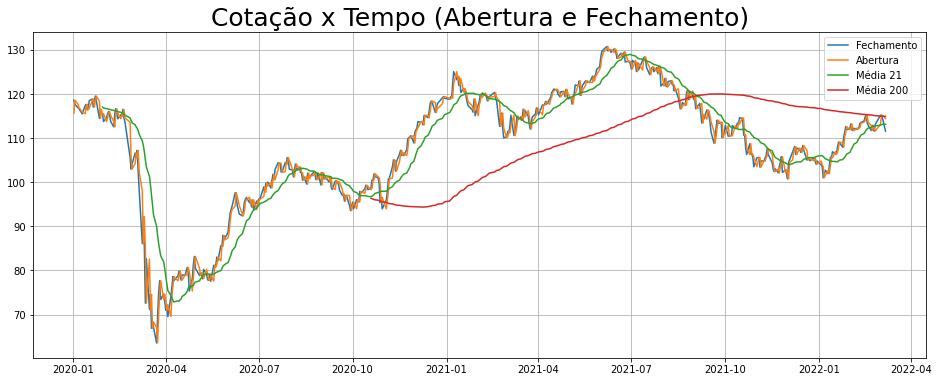

In [19]:
# Grafíco da Abertura e Fechamento das ações com as Médias Moveis

tickers_FA = ['Fechamento', 'Abertura', 'Média 21', 'Média 200']
plt.figure(figsize=(16,6))
for i in tickers_FA:
        plt.plot(df.Data, df[i])
        
plt.legend(tickers_FA)
plt.grid()
plt.title("Cotação x Tempo (Abertura e Fechamento)", fontsize = 25)
plt.show()

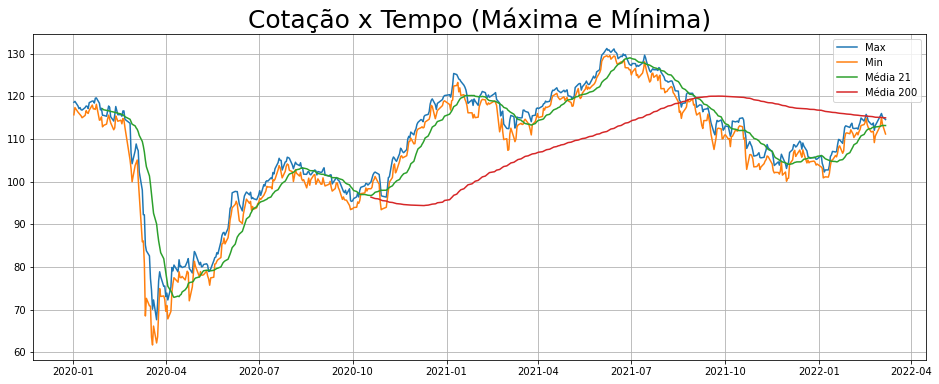

In [20]:
# Grafíco da Mínima e Máxima das ações com as Médias Moveis
tickers_MM = ['Max', 'Min', 'Média 21', 'Média 200']
plt.figure(figsize=(16,6))

for i in tickers_MM:
        plt.plot(df.Data, df[i])
        

plt.legend(tickers_MM)
plt.grid()
plt.title("Cotação x Tempo (Máxima e Mínima)", fontsize = 25)
plt.show()

#### Informações

- Os preços da abertura do mercado e do  fechamento tendem a ter baixa variação;
- Os preços máximos e mínimos tem alta volatilidade durante o dia do pregão;
- A curto prazo os preços tendem a média movel 21 e no médio prazo tendem a média movel 200;
- No segundo gráfico o preço apresenta variação entre a média móvel 21 durante alguns dias.


### Análise da Variação Acumulada

#### Criando Data Frame para Visualização

In [21]:
# Criando data frame
df_mes_var = df.drop(['Fechamento', 'Abertura', 'Max', 'Min', 'Volume', 'Média 21', 'Média 200'], 1)
df_mes_var.head(5)

,Data,Variacao
540,2020-01-02,2.53
539,2020-01-03,-0.73
538,2020-01-06,-0.70
537,2020-01-07,-0.18
536,2020-01-08,-0.36


In [22]:
df_mes_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 540 to 1
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      540 non-null    datetime64[ns]
 1   Variacao  540 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.7 KB


In [23]:
# Separando Meses e Anos
df_mes_var['Mes'] = df_mes_var.Data.dt.strftime('%m')
df_mes_var['Ano'] = df_mes_var.Data.dt.strftime('%Y')


df_mes_var['Mes'] = pd.to_numeric(df_mes_var['Mes'],errors='coerce')
df_mes_var['Ano'] = pd.to_numeric(df_mes_var['Ano'],errors='coerce')

df_mes_var[['Mes', 'Ano']].head(5)

,Mes,Ano
540,1,2020
539,1,2020
538,1,2020
537,1,2020
536,1,2020


In [24]:
# Agrupando os dados
df_mes_var_gby = df_mes_var.drop ('Data', 1)
df_mes_var_gby = df_mes_var_gby.groupby(by = ['Ano', 'Mes'], 
                                    as_index = False, 
                                    ).sum()

In [25]:
# Ordenando
df_mes_var_gby.sort_values(['Ano', 'Mes'], inplace = True)
df_mes_var_gby.head(5)

,Ano,Mes,Variacao
0,2020,1,-1.46
1,2020,2,-8.41
2,2020,3,-28.90
3,2020,4,10.65
4,2020,5,8.61


#### Boxplot para Analíse Anual

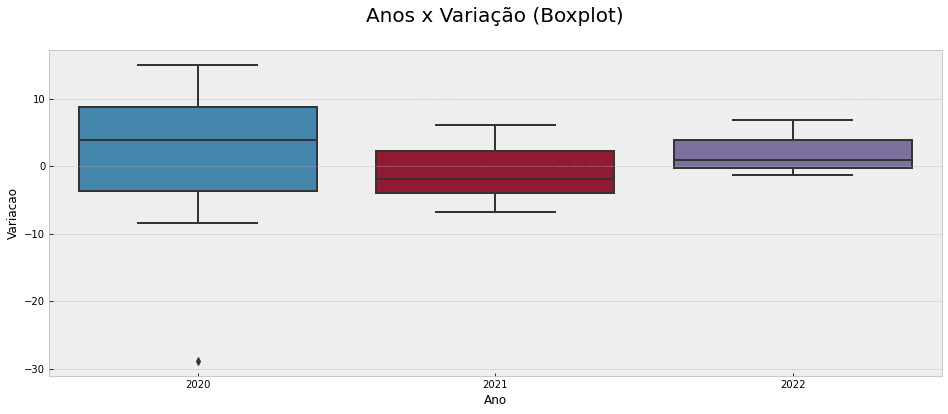

In [26]:
# Criando Boxplot
plt.figure(figsize=(16,6))
plt.style.use('bmh')
sns.boxplot(x='Ano', 
            y='Variacao',
            data = df_mes_var_gby)
plt.title('Anos x Variação (Boxplot)\n', fontsize=20)
plt.show()


#### Grafíco de Variação x Mês

In [27]:
# Separando DataFrames
df_mes_var_gby_2020 = df_mes_var_gby[(df_mes_var_gby["Ano"] == 2020)]
df_mes_var_gby_2021 = df_mes_var_gby[(df_mes_var_gby["Ano"] == 2021)]
df_mes_var_gby_2022 = df_mes_var_gby[(df_mes_var_gby["Ano"] == 2022)]

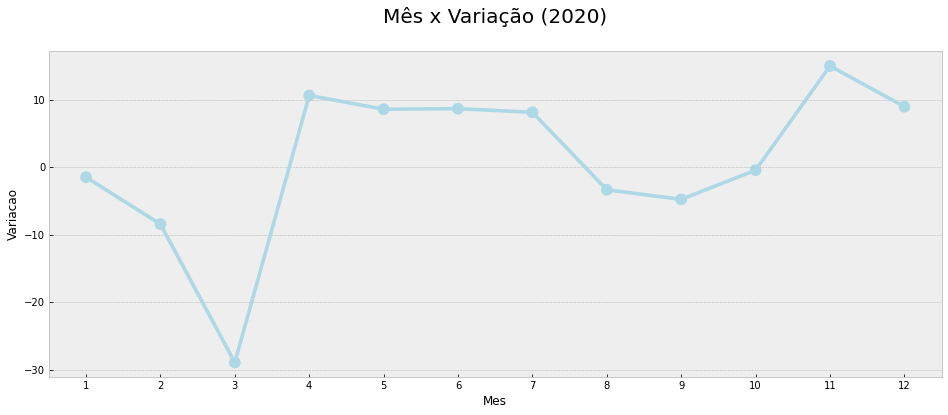

In [28]:
# Grafíco de Variação de 2020
plt.figure(figsize=(16,6))
sns.pointplot(data= df_mes_var_gby_2020, x = 'Mes', y = 'Variacao',capsize=.4, color = 'lightblue' )
plt.title('Mês x Variação (2020)\n', fontsize=20)
plt.show()

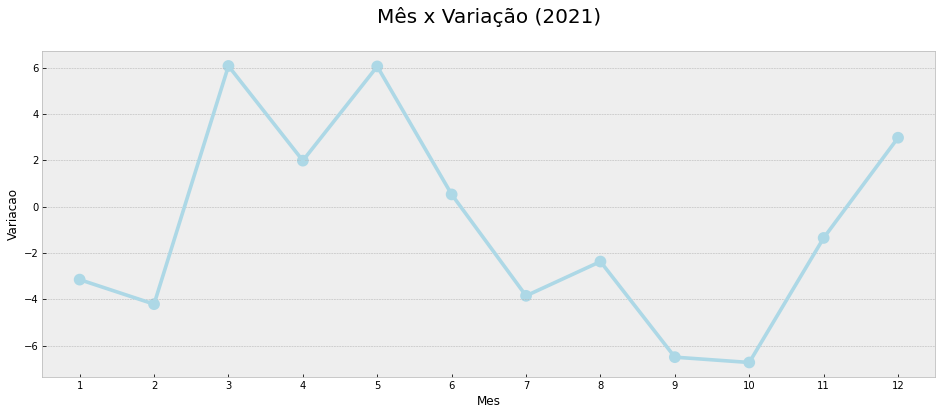

In [29]:
# Grafíco de Variação de 2020
plt.figure(figsize=(16,6))
sns.pointplot(data= df_mes_var_gby_2021, x = 'Mes', y = 'Variacao',capsize=.4, color = 'lightblue' )
plt.title('Mês x Variação (2021)\n', fontsize=20)
plt.show()

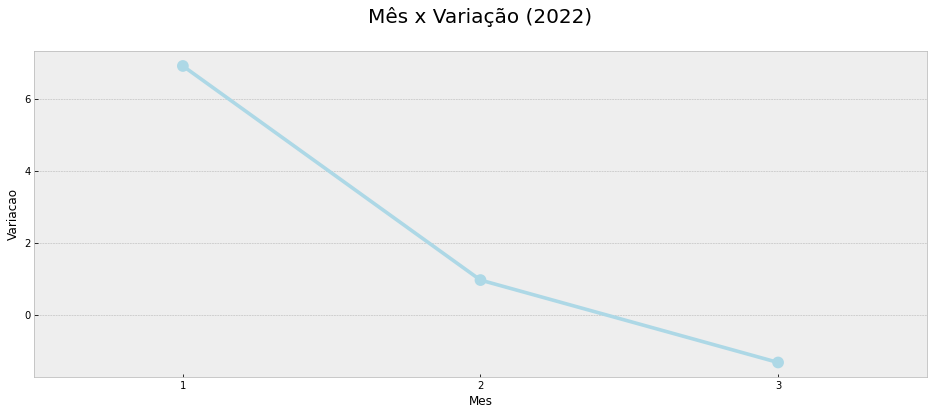

In [30]:
# Grafíco de Variação de 2020
plt.figure(figsize=(16,6))
sns.pointplot(data= df_mes_var_gby_2022, x = 'Mes', y = 'Variacao',capsize=.4, color = 'lightblue' )
plt.title('Mês x Variação (2022)\n', fontsize=20)
plt.show()

In [31]:
# Criando Coluna Dias da Semana

df_mes_var['Dias'] = df_mes_var['Data'].dt.day_name()
dic_Dias = {'Monday':'Segunda',
            'Thursday':'Quinta', 
            'Friday':'Sexta' , 
            'Tuesday':'Terça', 
            'Wednesday':'Quarta'}
df_mes_var['Dias'] = df_mes_var['Dias'].replace(dic_Dias)
df_mes_var['Dias']

540     Quinta
539      Sexta
538    Segunda
537      Terça
536     Quarta
        ...   
5        Sexta
4       Quarta
3       Quinta
2        Sexta
1      Segunda
Name: Dias, Length: 540, dtype: object

In [32]:
df_mes_var

,Data,Variacao,Mes,Ano,Dias
540,2020-01-02,2.53,1,2020,Quinta
539,2020-01-03,-0.73,1,2020,Sexta
538,2020-01-06,-0.70,1,2020,Segunda
537,2020-01-07,-0.18,1,2020,Terça
536,2020-01-08,-0.36,1,2020,Quarta
...,...,...,...,...,...
5,2022-02-25,1.39,2,2022,Sexta
4,2022-03-02,1.80,3,2022,Quarta
3,2022-03-03,-0.01,3,2022,Quinta
2,2022-03-04,-0.60,3,2022,Sexta


In [33]:
# Agrupando a Média e o Desvio Padrão

df_var_gby = df_mes_var.drop(['Ano', 'Mes'], 1)
df_var_gby_mean = df_var_gby.groupby(by = 'Dias', as_index = False).mean()
df_var_gby_std = df_var_gby.groupby(by = 'Dias', as_index = False).std()

In [34]:
# Unindo as Tabelas

df_var_gby_dias = pd.merge(df_var_gby_mean, df_var_gby_std, how = 'left', on = ['Dias', 'Dias'])
df_var_gby_dias.columns = ['Dias', 'Média', 'Desvio Padrão']
df_var_gby_dias

,Dias,Média,Desvio Padrão
0,Quarta,0.006250,2.044704
1,Quinta,-0.108727,2.047845
2,Segunda,-0.082736,2.554800
3,Sexta,-0.141604,2.111606
4,Terça,0.414528,1.801101


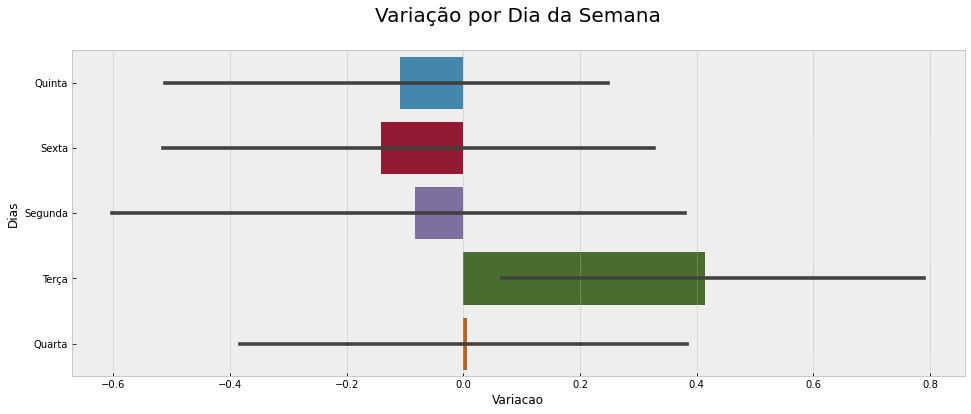

In [35]:
# Grafíco da Variação por Dia da Semana
plt.figure(figsize=  (16, 6))
sns.barplot(
    data=df_mes_var, 
    x="Variacao", 
    y="Dias");
plt.title('Variação por Dia da Semana\n', fontsize=20)
plt.show()

#### Informações

- O ano de 2020 é o ano com maior volatilidade, que foi ocasionada pelo fenômeno economico conhecido por cisne negro ( que no caso é a pandemia da COVID-19). Esse evento é algo não esperado, que têm baixa probabilidade de ocorrência, contudo quando ocorre gera gigantes ruídos no mercado;
- O mês 03/2020 é o com maior queda (-28.90 %) e o mês 11/2020 é o com maior crescimento (15.02 %);
- O ano de 2021 apresenta uma redução significativa da volatilidade;
- O ano de 2022 tem dados insuficientes para gerar conclusões;
- A segunda-feira é o dia mais volatil do mercado, tendo um desvio padrão de 2.55;
- Terça-feira apresenta tendência de alta do índice, sendo o dia com menor desvio padrão 1.801101.

### Análise do Volume

#### Criando Data Frame

In [36]:
# Separando Dados
df_vol = df.drop(['Fechamento', 'Abertura', 'Max', 'Min', 'Variacao', 'Média 21', 'Média 200'], 1)
df_vol.head(5)

,Data,Volume
540,2020-01-02,5160000.0
539,2020-01-03,6830000.0
538,2020-01-06,6570000.0
537,2020-01-07,4850000.0
536,2020-01-08,5910000.0


In [37]:
# Variação do volume negociado

df_vol['Variacao'] = df_vol['Volume'].pct_change() * 100
df_vol['Variacao']

540          NaN
539    32.364341
538    -3.806735
537   -26.179604
536    21.855670
         ...    
5       4.586063
4     -39.066059
3      13.271028
2     -11.551155
1      31.156716
Name: Variacao, Length: 540, dtype: float64

In [38]:
df_vol['Semana'] = df_vol['Data'].dt.to_period('W')
df_vol['Ano'] = df_vol.Data.dt.strftime('%Y')

df_vol['Ano'] = pd.to_numeric(df_vol['Ano'],errors='coerce')

In [39]:
df_vol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 540 to 1
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      540 non-null    datetime64[ns]
 1   Volume    540 non-null    float64       
 2   Variacao  539 non-null    float64       
 3   Semana    540 non-null    period[W-SUN] 
 4   Ano       540 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), period[W-SUN](1)
memory usage: 25.3 KB


#### Boxplot de Variação do Volume por Semana

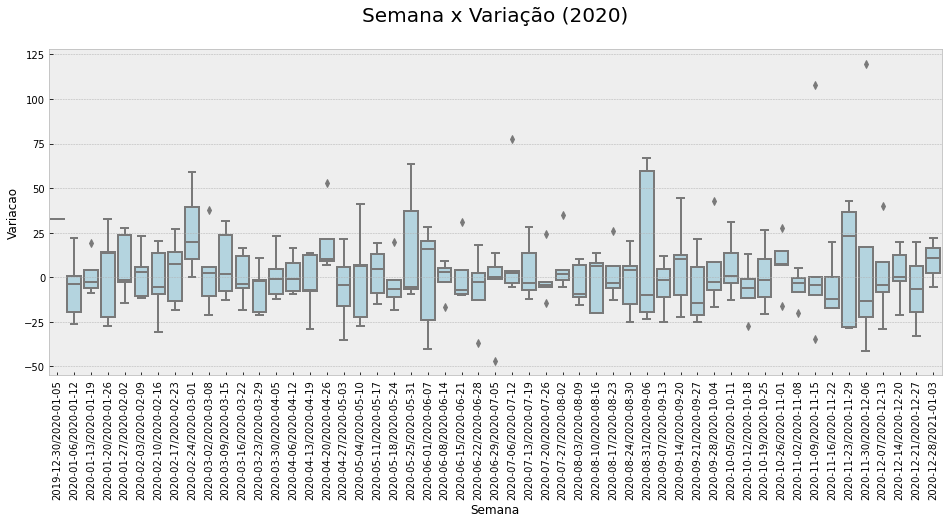

In [40]:
# Boxplot de Variação x Semana de 2020
df_vol_2020 = df_vol[(df_vol['Ano'] == 2020)]
plt.figure(figsize=(16,6))
sns.boxplot(data= df_vol_2020, x = 'Semana', y = 'Variacao', color = 'lightblue' )
plt.xticks(rotation=90)
plt.title('Semana x Variação (2020)\n', fontsize=20)
plt.show()

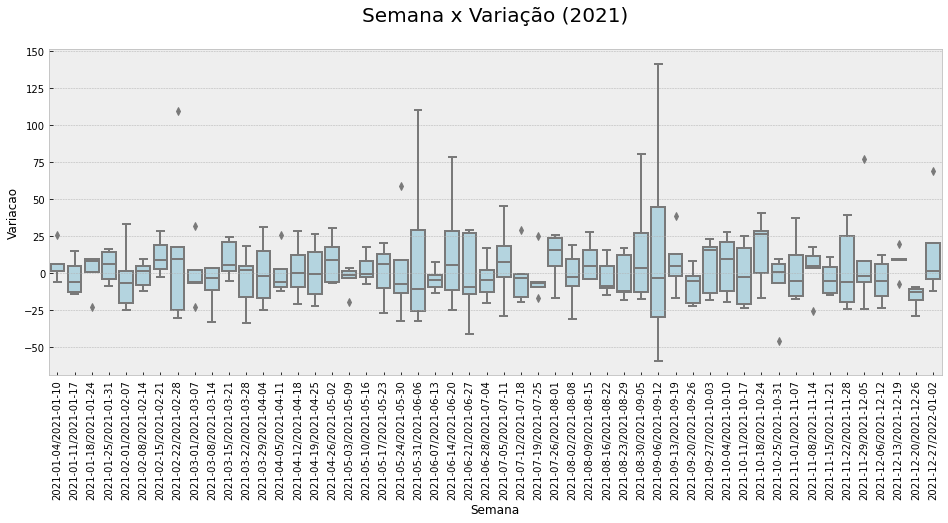

In [41]:
# Boxplot de Variação x Semana de 2020
df_vol_2021 = df_vol[(df_vol['Ano'] == 2021)]
plt.figure(figsize=(16,6))
sns.boxplot(data= df_vol_2021, x = 'Semana', y = 'Variacao', color = 'lightblue' )
plt.xticks(rotation=90)
plt.title('Semana x Variação (2021)\n', fontsize=20)
plt.show()


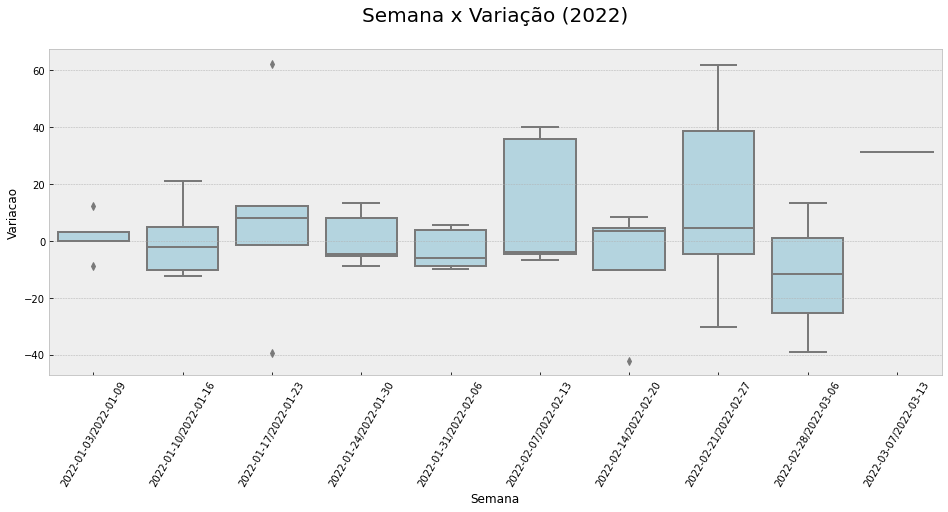

In [42]:

# Boxplot de Variação x Semana de 2020
df_vol_2022 = df_vol[(df_vol['Ano'] == 2022)]
plt.figure(figsize=(16,6))
sns.boxplot(data= df_vol_2022, x = 'Semana', y = 'Variacao', color = 'lightblue' )
plt.xticks(rotation= 60)
plt.title('Semana x Variação (2022)\n', fontsize=20)
plt.show()

#### Boxplot da Variação do Volume por Ano

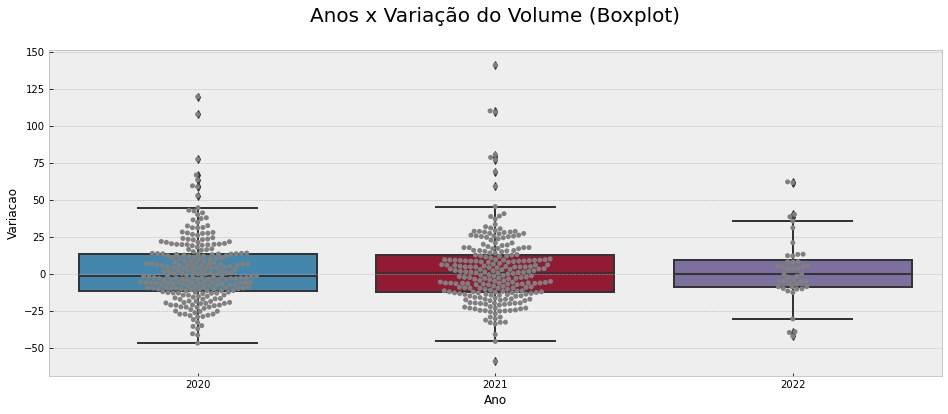

In [43]:
# Criando Boxplot
df_vol['Ano'] = df_vol['Data'].dt.to_period('Y')
plt.figure(figsize=(16,6))
plt.style.use('bmh')

sns.boxplot(x='Ano', 
            y='Variacao',
            data = df_vol)

sns.swarmplot(x='Ano', 
               y='Variacao', 
               data=df_vol, 
               color="grey")

plt.title('Anos x Variação do Volume (Boxplot)\n', fontsize=20)
plt.show()

#### Analisando por Dia da Semana

In [44]:
# Criando Coluna Dias da Semana

df_vol['Dias'] = df_vol['Data'].dt.day_name()
dic_Dias = {'Monday':'Segunda',
            'Thursday':'Quinta', 
            'Friday':'Sexta' , 
            'Tuesday':'Terça', 
            'Wednesday':'Quarta'}
df_vol['Dias'] = df_vol['Dias'].replace(dic_Dias)
df_vol['Dias']


540     Quinta
539      Sexta
538    Segunda
537      Terça
536     Quarta
        ...   
5        Sexta
4       Quarta
3       Quinta
2        Sexta
1      Segunda
Name: Dias, Length: 540, dtype: object

In [45]:
# Agrupando a Média e o Desvio Padrão

df_vol_gby = df_vol.drop(['Ano', 'Volume', 'Semana'], 1)
df_vol_gby_mean = df_vol_gby.groupby(by = 'Dias', as_index = False).mean()
df_vol_gby_std = df_vol_gby.groupby(by = 'Dias', as_index = False).std()

In [46]:
# Unindo as Tabelas

df_vol_gby_dias = pd.merge(df_vol_gby_mean, df_vol_gby_std, how = 'left', on = ['Dias', 'Dias'])
df_vol_gby_dias.columns = ['Dias', 'Média', 'Desvio Padrão']
df_vol_gby_dias


,Dias,Média,Desvio Padrão
0,Quarta,5.914935,21.765837
1,Quinta,1.698425,18.355054
2,Segunda,-2.892870,29.341192
3,Sexta,1.196555,20.833693
4,Terça,6.510541,23.340639


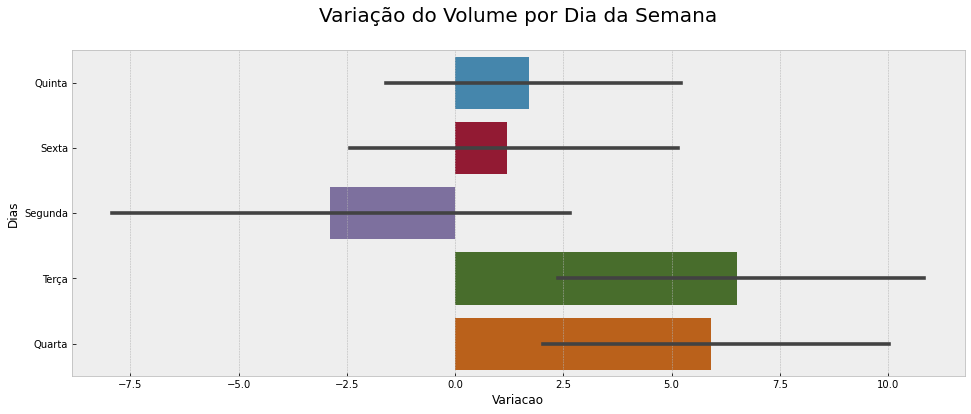

In [47]:
# Grafíco da Variação do Volume por Dia da Semana
plt.figure(figsize=  (16, 6))
sns.barplot(
    data=df_vol, 
    x="Variacao", 
    y="Dias");
plt.title('Variação do Volume por Dia da Semana\n', fontsize=20)
plt.show()

#### Informações

- A mediana da variação do volume tende a ficar proxima de zero;
- Durante as semanas geralmente a um dia que foge do padrão, sendo represendado com outlier;
- A distribuição da variação do volume anual é um grafíco normal;
- Durante as semanas o variação do volume tendem a variar proxímo de -25% a 25%;
- As semanas de 31-05-2021/06-06-2021 e 06-09-2021/12-09-2021 apresentam corportamento atipico com uma alta volatilidade;
- Segunda-feira é o dia mais volatil e com tendência de redução do volume negociado;
- Terça-feira e quarta-feira apresentam tendêndia de aumento do volume negociado.

### Análise de Correlação 

####  Variação do IBOV x Variação do Volume Negociado

In [50]:
df_varIBOV_vol = pd.merge(df_mes_var, df_vol, how = 'left', on = ['Data', 'Data'], suffixes= ('_IBOV', '_Vol'))
df_varIBOV_vol.head(5)

,Data,Variacao_IBOV,Mes,Ano_IBOV,Dias_IBOV,Volume,Variacao_Vol,Semana,Ano_Vol,Dias_Vol
0,2020-01-02,2.53,1,2020,Quinta,5160000.0,NaN,2019-12-30/2020-01-05,2020,Quinta
1,2020-01-03,-0.73,1,2020,Sexta,6830000.0,32.364341,2019-12-30/2020-01-05,2020,Sexta
2,2020-01-06,-0.70,1,2020,Segunda,6570000.0,-3.806735,2020-01-06/2020-01-12,2020,Segunda
3,2020-01-07,-0.18,1,2020,Terça,4850000.0,-26.179604,2020-01-06/2020-01-12,2020,Terça
4,2020-01-08,-0.36,1,2020,Quarta,5910000.0,21.855670,2020-01-06/2020-01-12,2020,Quarta


<Figure size 1296x432 with 0 Axes>

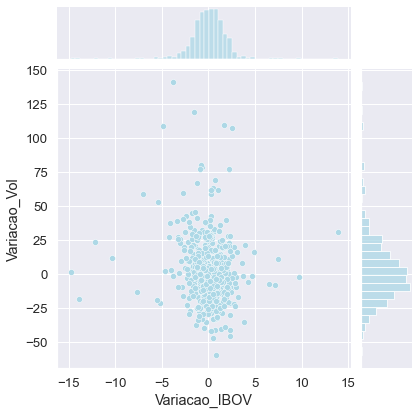

In [51]:
plt.figure(figsize = (18, 6))
sns.set(font_scale = 1.2)
sns.jointplot(data = df_varIBOV_vol, x = 'Variacao_IBOV', y = 'Variacao_Vol', color = 'lightblue' );

##  Conclusões

- A médias moveis são importantes indicadores para entender a variação do IBOV
- O dias da semana tem diferenças significativas na variação do IBOV e do volume negociado
- O ano de 2020 é um ano atipico comparado com a movimentação dos outros anos
- Não existe correlação entre a variação do índice e a variação do volume negociado